#### Cluster analysis to cluster similar coins

In [4]:
%matplotlib inline
# coin price clustering with k-means

import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn

import warnings
warnings.filterwarnings('ignore')

In [5]:
'''
Function to load price data from disk 
'''
def load_data(symbol,years,path):
    
    for count,year in enumerate(years):
        if count == 0:
            df = pd.read_csv(path + '/' + str(year) + '/' + symbol + '.csv')
        else:
            df = pd.concat([df,pd.read_csv(path + '/' + str(year) + '/' + symbol + '.csv')]) 
    
    df = df.reset_index(drop=True)
    
    return df

In [6]:
# set configuration
path = '../'  
years=[2019,2020,2021]  

# get coins to analyze
coins = pd.read_csv(path + 'coins.csv',header=None).values[0]    

# create an Empty DataFrame object
df = pd.DataFrame()

# load data for coins into columns
for coin in coins:
    df[coin] = load_data(coin,years,path+'price-data/')['Close']

In [7]:
df

,BTC,ETH,ADA,DOGE,XRP,HEX,BCH,LTC,LINK,MATIC,...,BTS,CVC,DERO,MLN,TOMO,AVA,ARDR,XHV,ETN,BCN
0,3843.520020,140.819412,0.042547,0.002392,0.364771,0.000171,164.854599,31.979931,0.299371,0.004421,...,0.039627,0.054520,0.938746,7.560998,0.307361,0.162806,0.054271,0.710078,0.007622,0.000716
1,3943.409424,155.047684,0.045258,0.002407,0.375243,0.000265,171.827377,33.433681,0.316489,0.003471,...,0.041815,0.055390,0.928734,8.699044,0.338898,0.153119,0.054969,0.715383,0.007734,0.000725
2,3836.741211,149.135010,0.042682,0.002360,0.360224,0.000256,162.049927,32.026699,0.365974,0.004478,...,0.039650,0.053987,0.862939,8.319635,0.324398,0.146013,0.054125,0.655627,0.007458,0.000706
3,3857.717529,154.581940,0.043812,0.002315,0.356747,0.000129,161.395630,32.404167,0.437175,0.004374,...,0.039895,0.054517,0.883271,8.566726,0.287430,0.138265,0.056234,0.678547,0.007379,0.000690
4,3845.194580,155.638596,0.044701,0.002319,0.355275,0.000218,160.401215,34.936867,0.395948,0.004198,...,0.039658,0.054707,0.910166,8.534426,0.291817,0.135108,0.060984,0.660816,0.007303,0.000707
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899,35698.296875,2231.733154,1.429188,0.280900,0.776377,NaN,557.529602,155.092590,21.735416,NaN,...,0.050484,0.226584,9.542310,85.844887,1.529454,NaN,0.150812,7.931671,0.007143,0.001265
900,31676.693359,2178.499023,1.177480,0.178691,0.610388,NaN,456.293457,124.786461,17.424097,NaN,...,0.038901,0.173655,11.236687,68.671539,1.453151,NaN,0.111384,7.817036,0.006132,0.000449
901,32505.660156,2246.364502,1.153254,0.191031,0.545067,NaN,443.783264,119.602684,16.806492,NaN,...,0.040624,0.169500,NaN,62.037579,NaN,NaN,0.101572,NaN,0.005939,0.000695
902,33723.027344,1888.447510,1.252896,0.232174,0.626535,NaN,469.375641,128.674988,18.387203,NaN,...,0.042401,0.191127,NaN,67.263611,NaN,NaN,0.106878,NaN,0.006223,0.001872


In [8]:
# find expected annual returns and variance for clustering
expected_return = df.pct_change().mean()*365  # avg yearly return   - measure of profit
variance = df.pct_change().var()*365          # avg yearly variance - measure of volatility

In [9]:
# empty dataframe for clustering
final_df = pd.DataFrame()

# add coins column
final_df['coin'] = df.columns

# add return values
final_df['return'] = expected_return.values

# add variance values
final_df['variance'] = variance.values

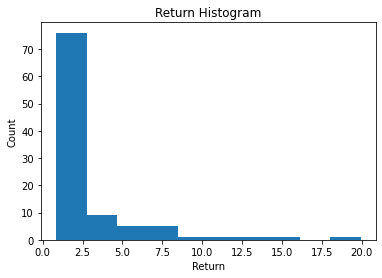

In [10]:
plt.hist(final_df['return'])
plt.title('Return Histogram')
plt.xlabel('Return')
plt.ylabel('Count')
plt.show()

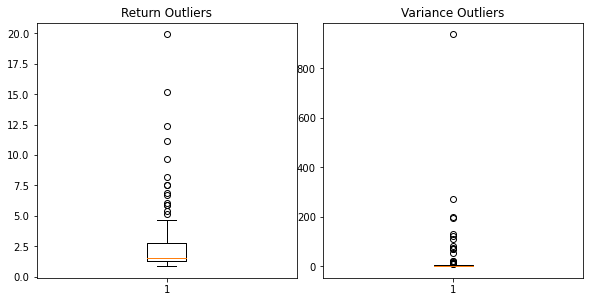

In [11]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, constrained_layout=True, figsize=(8,4))
ax1.boxplot(final_df['return'])
ax1.set_title('Return Outliers')

ax2.boxplot(final_df['variance'])
ax2.set_title('Variance Outliers')

fig.tight_layout(pad=0.0)

plt.show()

In [13]:
# remove outliers
drop_coins = ['CHZ','XWC']
test_df = final_df[~final_df['coin'].isin(drop_coins)] 

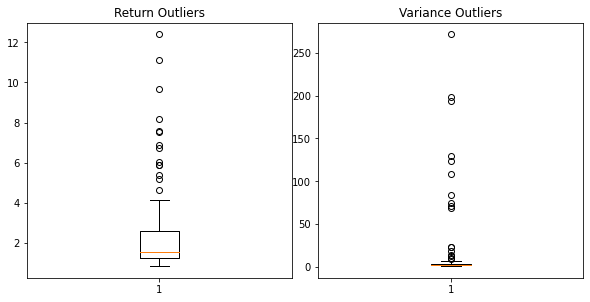

In [14]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, constrained_layout=True, figsize=(8,4))
ax1.boxplot(test_df['return'])
ax1.set_title('Return Outliers')

ax2.boxplot(test_df['variance'])
ax2.set_title('Variance Outliers')

fig.tight_layout(pad=0.0)

plt.show()

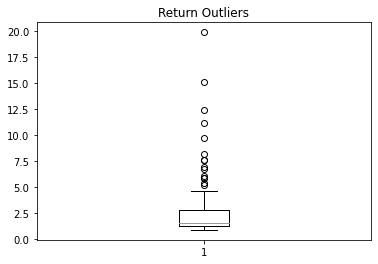

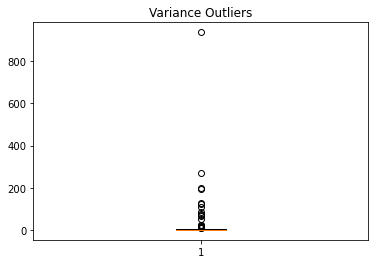

In [15]:
plt.boxplot(final_df['return'])
plt.title('Return Outliers')
plt.show()

plt.boxplot(final_df['variance'])
plt.title('Variance Outliers')
plt.show()

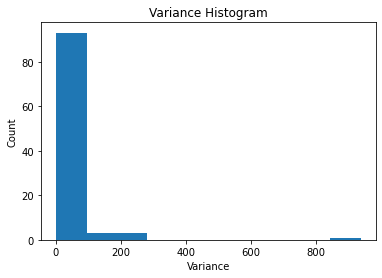

In [16]:
plt.hist(final_df['variance'])
plt.title('Variance Histogram')
plt.xlabel('Variance')
plt.ylabel('Count')
plt.show()

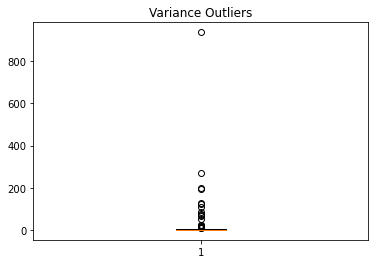

In [17]:
plt.boxplot(final_df['variance'])
plt.title('Variance Outliers')
plt.show()

In [18]:
# remove outliers
drop_coins = ['CHZ','XWC']
final_df = final_df[~final_df['coin'].isin(drop_coins)] 

In [19]:
# save final dataframe for coinpix application
final_df.to_csv('../returns.csv')

In [20]:
# find optinum number of clusters using elbow method

colnames = ['return','variance'] # column names for training
inertia = [] # list to hold inertia values for each K value

# set training values
X = final_df[colnames].values

# train model for cluster sizes 2 to 10
for k in range(2,10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_) # append inertia to list

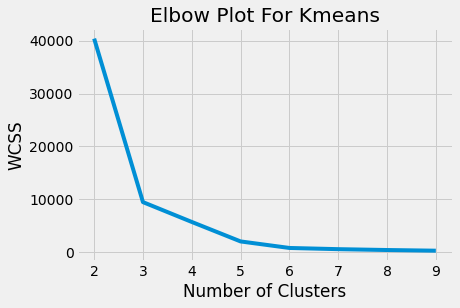

In [21]:
plt.style.use('fivethirtyeight')
plt.plot(range(2,10), inertia)
plt.title("Elbow Plot For Kmeans")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()  # best number of clusters k=4

In [22]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [23]:
# kmeans clustering for k=4
kmeans = KMeans(n_clusters=3).fit(X)
labels = kmeans.labels_

# add labels to dataframe
final_df['cluster'] = labels

final_df.head()

,coin,return,variance,cluster
0,BTC,1.179525,0.566068,0
1,ETH,1.528369,0.932081,0
2,ADA,2.057490,1.319614,0
3,DOGE,3.589713,5.659477,0
4,XRP,0.972929,1.502262,0


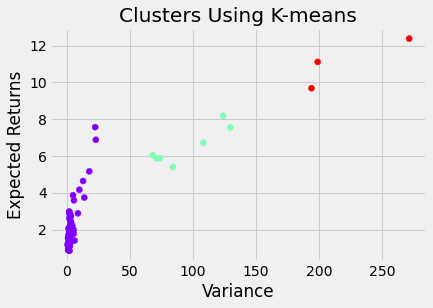

In [24]:
# plot clusters
plt.style.use('fivethirtyeight')
plt.scatter(X[:,1],X[:,0], c=labels, cmap='rainbow')
plt.title('Clusters Using K-means')
plt.xlabel('Variance')
plt.ylabel('Expected Returns')
plt.show()

In [25]:
# appears to be a couple of outliers that are affecting the results
final_df['variance'].max()

271.63057269437815

In [26]:
# show coins with variance above 900
final_df[final_df.variance>900]  

,coin,return,variance,cluster


In [27]:
# show coins with returns above 15%
final_df[final_df['return']>15]

,coin,return,variance,cluster


In [28]:
# remove these coins and repeat analysis
modified_df = final_df[final_df['return']<15]

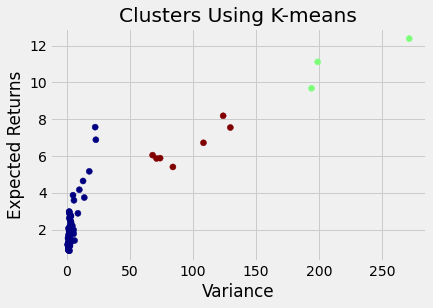

In [29]:
# set training values
X = modified_df[colnames].values

# kmeans clustering for k=3
kmeans = KMeans(n_clusters=3).fit(X)
labels = kmeans.labels_

# add labels to dataframe
modified_df['cluster'] = labels

# plot clusters
plt.scatter(X[:,1],X[:,0], c=labels, cmap='jet')
plt.title('Clusters Using K-means')
plt.xlabel('Variance')
plt.ylabel('Expected Returns')
plt.show()

In [30]:
modified_df

,coin,return,variance,cluster
0,BTC,1.179525,0.566068,0
1,ETH,1.528369,0.932081,0
2,ADA,2.057490,1.319614,0
3,DOGE,3.589713,5.659477,0
4,XRP,0.972929,1.502262,0
...,...,...,...,...
95,AVA,6.046762,68.050562,2
96,ARDR,1.064982,1.548637,0
97,XHV,2.467752,3.044253,0
98,ETN,0.848945,2.160986,0


In [31]:
modified_df.to_csv('clusters.csv')